El objeitvo de este notebook es realizar un EDA a partir de los datos obtenidos por la simulación Monte Carlo a partir de los datos obtenidos por la API OpenMeteo. Los datos obtenidos por la Api corresponden al periodo 2013-2023 mientras que los datos de la simulación corresponden al periodo 2024-2044


In [1]:
# Leer el archivo CSV
file_path <- "~/GitHub/SOLAR_LCOE_UY/data/raw/RadiationSim2024_2044.csv"
data <- read.csv(file_path)




In [2]:
# Mostrar las primeras filas del DataFrame
head(data)

,date,value,id
,<chr>,<dbl>,<int>
1,2024-01-01,4043.990,1
2,2024-01-02,7329.484,1
3,2024-01-03,8325.992,1
4,2024-01-04,7973.211,1
5,2024-01-05,4699.243,1
6,2024-01-06,6705.202,1


In [3]:
#Acercamiento a la data
summary(data)


     date               value             id        
 Length:7671000     Min.   :-5973   Min.   :   1.0  
 Class :character   1st Qu.: 2675   1st Qu.: 250.8  
 Mode  :character   Median : 4062   Median : 500.5  
                    Mean   : 4525   Mean   : 500.5  
                    3rd Qu.: 6076   3rd Qu.: 750.2  
                    Max.   :18122   Max.   :1000.0  

In [4]:
# Convertir la columna 'date' a formato Date para extraer componentes temporales
data$date <- as.Date(data$date)

# Función para asignar la estación en función del mes
get_season <- function(month) {
  if (month %in% c(12, 1, 2)) {
    return("Verano")    # Diciembre, Enero, Febrero
  } else if (month %in% c(3, 4, 5)) {
    return("Otoño")     # Marzo, Abril, Mayo
  } else if (month %in% c(6, 7, 8)) {
    return("Invierno")  # Junio, Julio, Agosto
  } else if (month %in% c(9, 10, 11)) {
    return("Primavera") # Septiembre, Octubre, Noviembre
  }
}

# Crear una nueva columna 'season' basada en el mes extraído de 'date'
data$season <- sapply(format(data$date, "%m"), function(x) get_season(as.numeric(x)))

# Mostrar las primeras filas para confirmar la nueva variable de estación
head(data[c("date", "season")])

# Mostrar los valores únicos de la columna 'season'
unique(data$season)


,date,season
,<date>,<chr>
1,2024-01-01,Verano
2,2024-01-02,Verano
3,2024-01-03,Verano
4,2024-01-04,Verano
5,2024-01-05,Verano
6,2024-01-06,Verano


[1] "Verano"    "Otoño"     "Invierno"  "Primavera"

In [5]:
head(data)


,date,value,id,season
,<date>,<dbl>,<int>,<chr>
1,2024-01-01,4043.990,1,Verano
2,2024-01-02,7329.484,1,Verano
3,2024-01-03,8325.992,1,Verano
4,2024-01-04,7973.211,1,Verano
5,2024-01-05,4699.243,1,Verano
6,2024-01-06,6705.202,1,Verano



Adjuntando el paquete: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




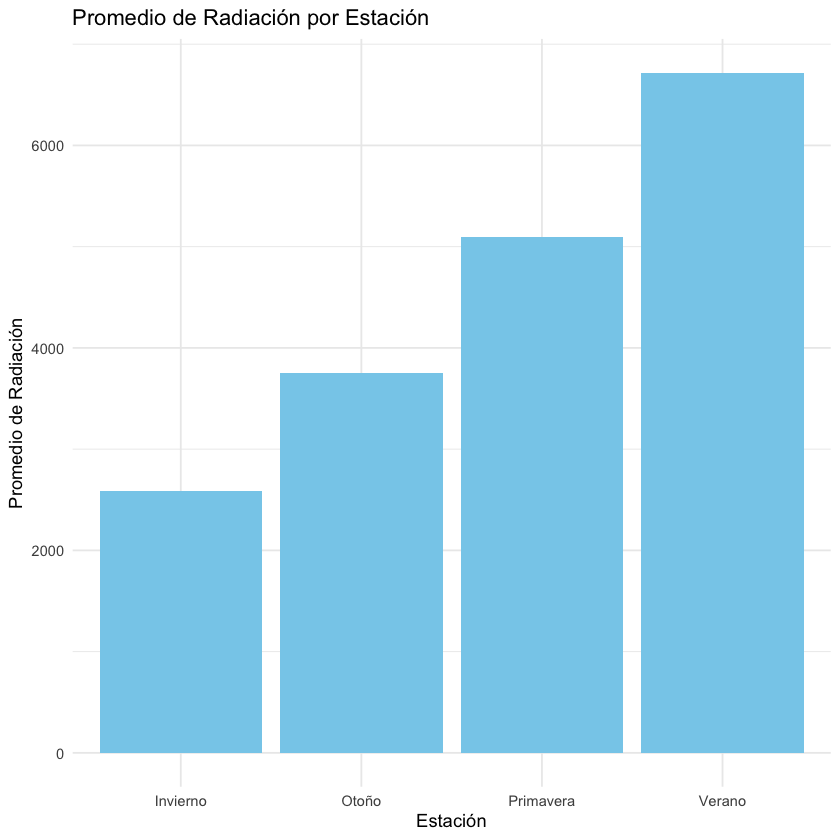

In [6]:
# Crear una nueva columna 'season' basada en el mes extraído de 'date'
data$season <- sapply(format(data$date, "%m"), function(x) get_season(as.numeric(x)))

# Calcular el promedio de radiación por estación
library(dplyr)
seasonal_avg <- data %>%
  group_by(season) %>%
  summarise(avg_radiation = mean(value, na.rm = TRUE))

# Graficar el promedio de radiación por estación
library(ggplot2)
ggplot(seasonal_avg, aes(x = season, y = avg_radiation)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Promedio de Radiación por Estación",
       x = "Estación",
       y = "Promedio de Radiación") +
  theme_minimal()

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


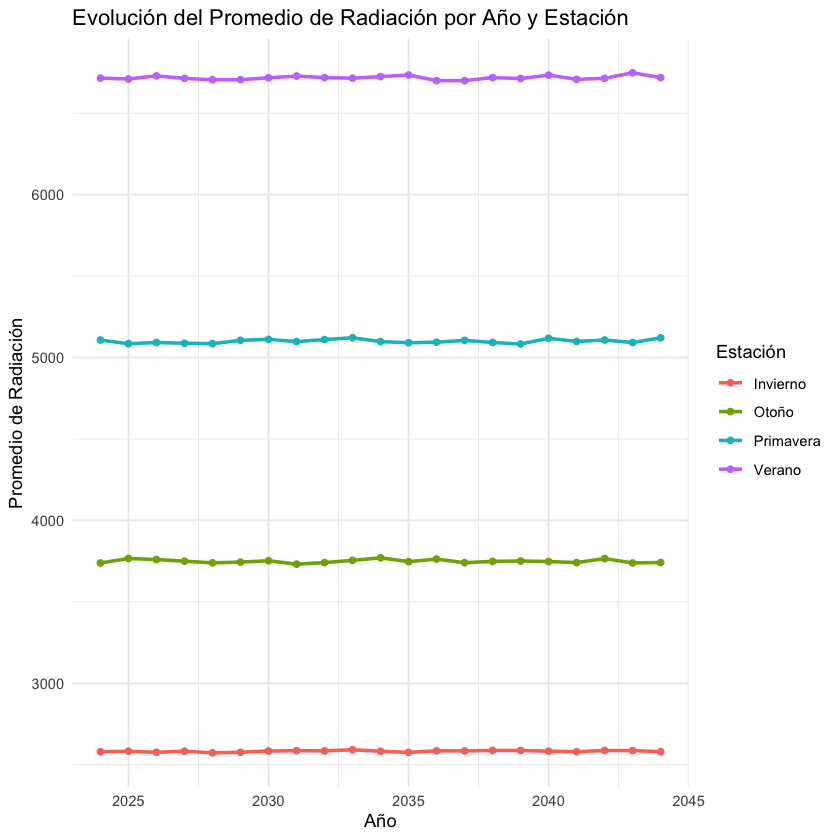

In [7]:
# Extraer el año de la columna 'date' para hacer el análisis por año
data$year <- format(data$date, "%Y")

# Calcular el promedio de radiación por año y estación
library(dplyr)
seasonal_yearly_avg <- data %>%
  group_by(year, season) %>%
  summarise(avg_radiation = mean(value, na.rm = TRUE))

# Graficar la evolución del promedio de radiación por año y estación
library(ggplot2)
ggplot(seasonal_yearly_avg, aes(x = as.numeric(year), y = avg_radiation, color = season, group = season)) +
  geom_line(size = 1) +
  geom_point() +
  labs(title = "Evolución del Promedio de Radiación por Año y Estación",
       x = "Año",
       y = "Promedio de Radiación",
       color = "Estación") +
  theme_minimal()

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


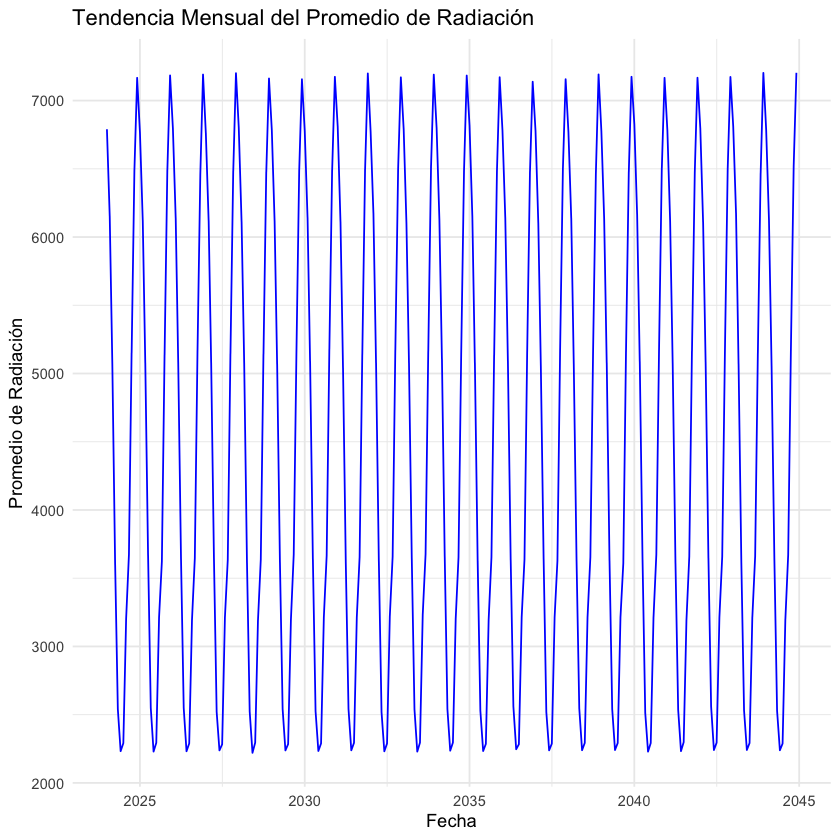

In [8]:
library(dplyr)

# Asegurarse de que 'year' y 'month' existen en el dataset
data$year <- format(data$date, "%Y")
data$month <- format(data$date, "%m")

# Calcular el promedio de radiación por año y mes
monthly_avg <- data %>%
  group_by(year, month) %>%
  summarise(avg_radiation = mean(value, na.rm = TRUE))

# Convertir año y mes a formato de fecha
monthly_avg$date <- as.Date(paste(monthly_avg$year, monthly_avg$month, "01", sep = "-"))

# Graficar la tendencia mensual
library(ggplot2)
ggplot(monthly_avg, aes(x = date, y = avg_radiation)) +
  geom_line(color = "blue") +
  labs(title = "Tendencia Mensual del Promedio de Radiación",
       x = "Fecha",
       y = "Promedio de Radiación") +
  theme_minimal()



In [9]:
# Convertir año y mes a numérico para facilitar la correlación
data$numeric_year <- as.numeric(data$year)
data$numeric_month <- as.numeric(data$month)

# Calcular la correlación entre radiación y los componentes temporales
correlation_year <- cor(data$value, data$numeric_year, use = "complete.obs")
correlation_month <- cor(data$value, data$numeric_month, use = "complete.obs")

# Mostrar las correlaciones
correlation_year
correlation_month


[1] 0.000661976

[1] 0.05655754

In [10]:
# Vector con los nombres de los meses en español
meses_espanol <- c("Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
                   "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre")

# Gráfica modificada (ejes resaltados sin quitar la cuadrícula)
ggplot(monthly_avg_radiation, aes(x = as.numeric(month), y = avg_radiation)) +
  geom_line(color = "darkgreen") +
  geom_point() +
  labs(
    title = "Promedio de Radiación por Mes - Uruguay (2024-2044)",
    subtitle = "Energía acumulada",
    x = "Mes",
    y = expression("Promedio de Radiación (W/m"^2*"/h)")
  ) +
  scale_x_continuous(breaks = 1:12, labels = meses_espanol) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title = element_text(size = 12, face = "bold", color = "black"),
    axis.text = element_text(size = 10, face = "bold", color = "black"),
    axis.line = element_line(color = "black", linewidth = 1)
  )


ERROR: Error: objeto 'monthly_avg_radiation' no encontrado


In [11]:
library(ggplot2)

# Vector con los nombres de los meses en español
meses_espanol <- c("Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
                   "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre")

# Conversión de W a kW
monthly_avg_radiation$avg_radiation_kw <- monthly_avg_radiation$avg_radiation / 1000

# Gráfica modificada con unidades en kW/m²/h
ggplot(monthly_avg_radiation, aes(x = as.numeric(month), y = avg_radiation_kw)) +
  geom_line(color = "darkgreen") +
  geom_point() +
  labs(
    title = "Promedio de Radiación por Mes - Uruguay (2024-2044)",
    subtitle = "Energía acumulada",
    x = "Mes",
    y = expression("Promedio de Radiación (kW/m"^2*"/h)")
  ) +
  scale_x_continuous(breaks = 1:12, labels = meses_espanol) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title = element_text(size = 12, face = "bold", color = "black"),
    axis.text = element_text(size = 10, face = "bold", color = "black"),
    axis.line = element_line(color = "black", linewidth = 1)
  )


ERROR: Error: objeto 'monthly_avg_radiation' no encontrado


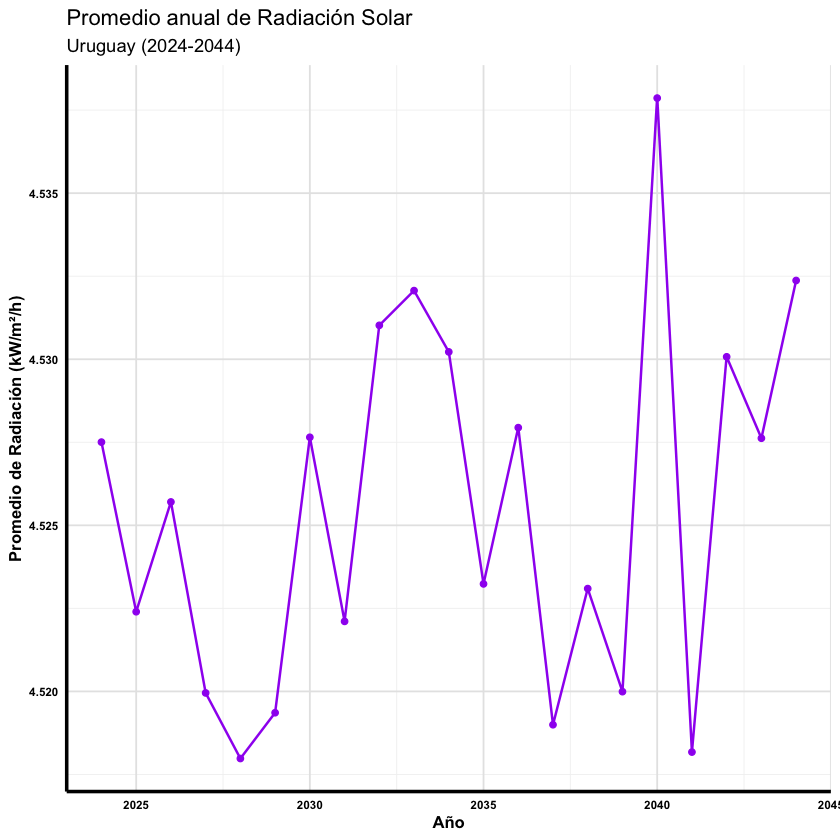

In [12]:
library(ggplot2)
library(dplyr)

# Calcular el promedio anual de radiación (en kW/m²/h)
annual_avg_radiation <- data %>%
  group_by(year) %>%
  summarise(avg_radiation = mean(value, na.rm = TRUE) / 1000)

# Gráfico final ajustado
ggplot(annual_avg_radiation, aes(x = as.numeric(year), y = avg_radiation)) +
  geom_line(color = "purple", linewidth = 0.7) + # línea más fina
  geom_point(color = "purple", size = 1.5) +
  labs(
    title = "Promedio anual de Radiación Solar",
    subtitle = "Uruguay (2024-2044) ",
    x = "Año",
    y = "Promedio de Radiación (kW/m²/h)"
  ) +
  theme_minimal() +
  theme(
    # Títulos de ejes en negro y negrita
    axis.title.x = element_text(face = "bold", color = "black", size = 10),
    axis.title.y = element_text(face = "bold", color = "black", size = 10),

    # Valores (ticks) en negro y negrita
    axis.text.x = element_text(face = "bold", color = "black", size = 7),
    axis.text.y = element_text(face = "bold", color = "black", size = 7),

    # Líneas de los ejes resaltadas en negro
    axis.line = element_line(color = "black", linewidth = 1),

    # Conservando la cuadrícula original del tema minimal
    panel.grid.major = element_line(color = "gray90"),
    panel.grid.minor = element_line(color = "gray95")
  )


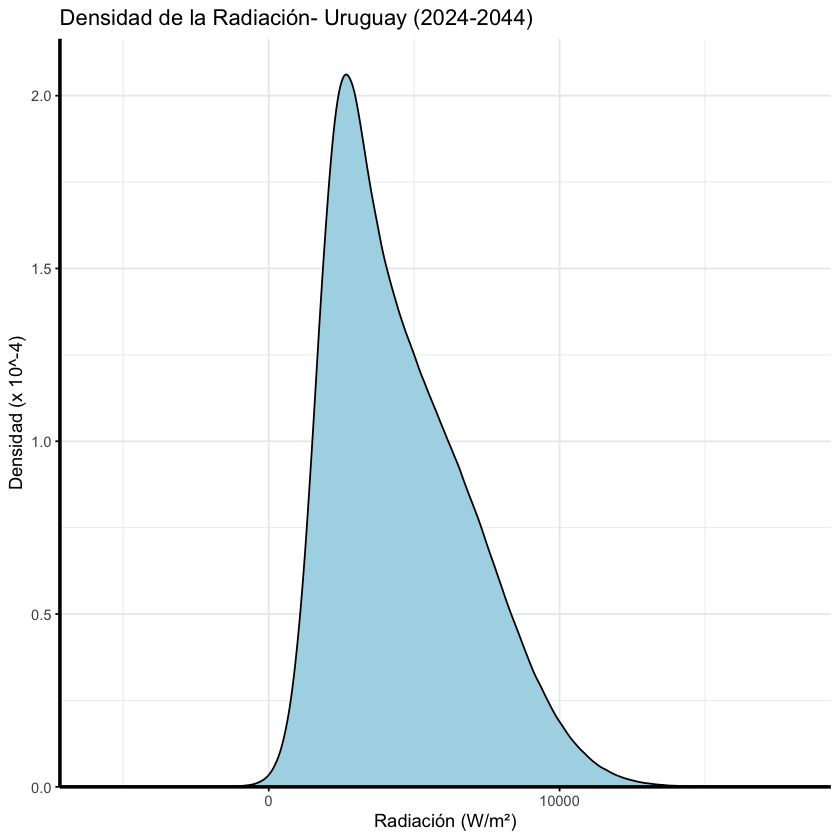

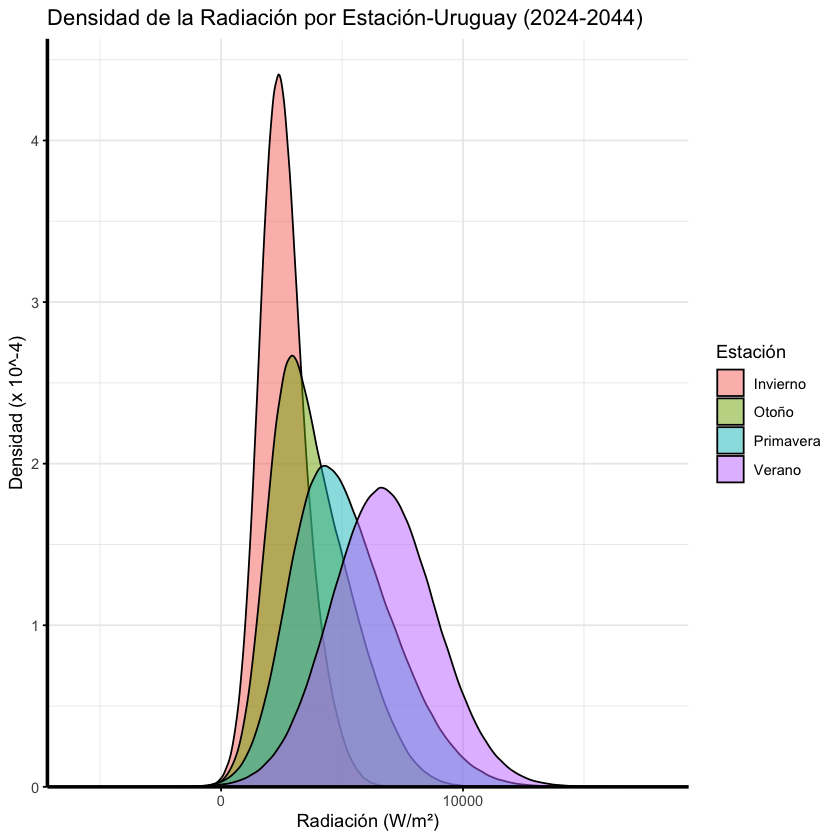

In [13]:
library(scales)
library(ggplot2)

# Gráfica general con ejes resaltados
ggplot(data, aes(x = value)) +
  geom_density(aes(y = after_stat(density * 10000)), fill = "lightblue") +
  labs(title = "Densidad de la Radiación- Uruguay (2024-2044)",
       x = "Radiación (W/m²)",
       y = "Densidad (x 10^-4)") +
  scale_y_continuous(breaks = pretty_breaks(n = 6), expand = expansion(mult = c(0, 0.05))) +
  theme_minimal() +
  theme(
    axis.line = element_line(color = "black", linewidth = 1),  # Líneas de ejes resaltadas
    axis.ticks = element_line(color = "black")                 # Marcas de ejes resaltadas
  )

# Gráfica por estación con ejes resaltados
ggplot(data, aes(x = value, fill = season)) +
  geom_density(aes(y = after_stat(density * 10000)), alpha = 0.5) +
  labs(title = "Densidad de la Radiación por Estación-Uruguay (2024-2044)",
       x = "Radiación (W/m²)",
       y = "Densidad (x 10^-4)",
       fill = "Estación") +
  scale_y_continuous(breaks = pretty_breaks(n = 6), expand = expansion(mult = c(0, 0.05))) +
  theme_minimal() +
  theme(
    axis.line = element_line(color = "black", linewidth = 1),  # Líneas de ejes resaltadas
    axis.ticks = element_line(color = "black")                 # Marcas de ejes resaltadas
  )


In [14]:
install.packages("highcharter")

also installing the dependencies ‘XML’, ‘rlist’, ‘rjson’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



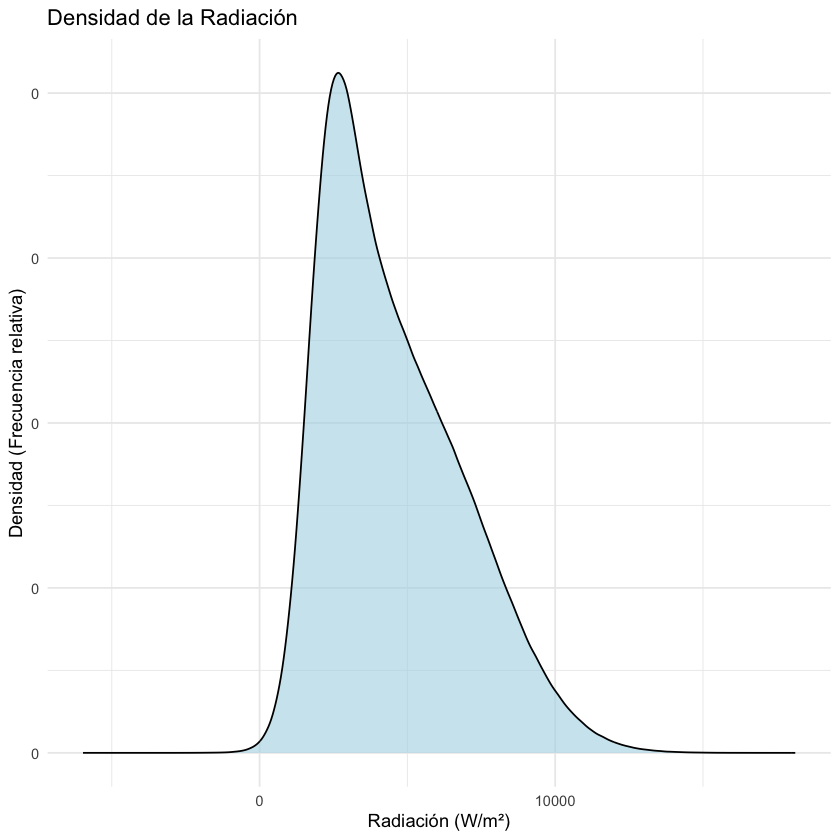

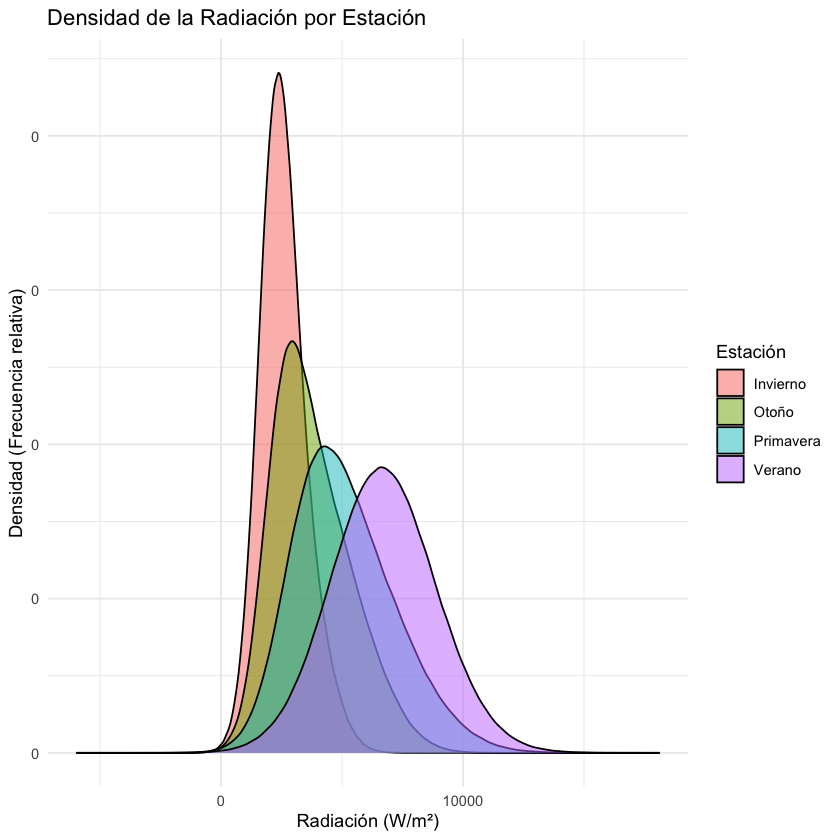

In [15]:
library(ggplot2)
library(scales)

# Densidad general de la Radiación
ggplot(data, aes(x = value)) +
  geom_density(fill = "lightblue", alpha = 0.6) +
  labs(title = "Densidad de la Radiación",
       x = "Radiación (W/m²)",
       y = "Densidad (Frecuencia relativa)") +
  scale_y_continuous(labels = label_number(scale = 1, accuracy = 1)) +
  theme_minimal()

# Densidad de la Radiación por Estación
ggplot(data, aes(x = value, fill = season)) +
  geom_density(alpha = 0.5) +
  labs(title = "Densidad de la Radiación por Estación",
       x = "Radiación (W/m²)",
       y = "Densidad (Frecuencia relativa)",
       fill = "Estación") +
  scale_y_continuous(labels = label_number(scale = 1, accuracy = 1)) +
  theme_minimal()



`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


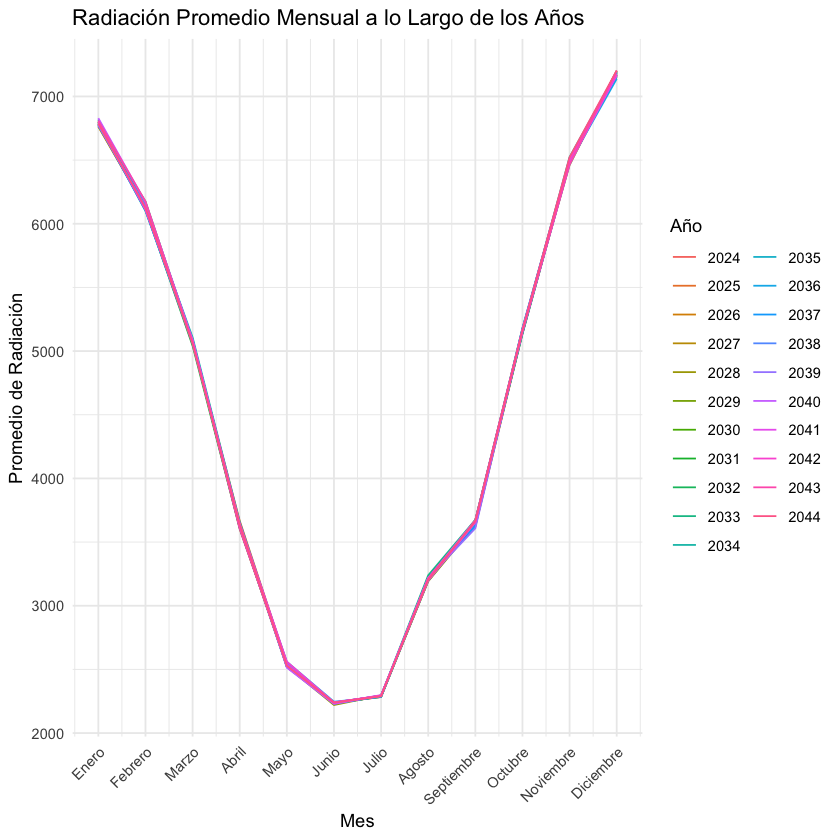

In [16]:
# ... (código previo) ...

# Asegúrate de que 'monthly_yearly_avg' está definido antes de usarlo
# Este fragmento de código debe ejecutarse antes del código que produce el error
library(dplyr)
data$year <- format(data$date, "%Y")  # Crea la columna 'year' si no existe
data$month <- format(data$date, "%m") # Crea la columna 'month' si no existe

monthly_yearly_avg <- data %>%
  group_by(year, month) %>%
  summarise(avg_radiation = mean(value, na.rm = TRUE))

ggplot(monthly_yearly_avg, aes(x = as.numeric(month), y = avg_radiation, group = year, color = year)) +
  geom_line() +
  labs(
    title = "Radiación Promedio Mensual a lo Largo de los Años",
    x = "Mes",
    y = "Promedio de Radiación",
    color = "Año"  # Cambiar la etiqueta de la leyenda
  ) +
  scale_x_continuous(breaks = 1:12, labels = meses_espanol) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


In [17]:
# Calcular el valor máximo y mínimo de radiación por estación
seasonal_extremes <- data %>%
  group_by(season) %>%
  summarise(max_radiation = max(value, na.rm = TRUE),
            min_radiation = min(value, na.rm = TRUE))

# Mostrar los valores máximos y mínimos por estación
seasonal_extremes



season,max_radiation,min_radiation
<chr>,<dbl>,<dbl>
Invierno,8649.884,-1841.694
Otoño,12857.312,-2262.794
Primavera,17171.214,-5973.076
Verano,18121.907,-3656.683
